In [1]:
%matplotlib inline

# Video Stabilization
Here we show a simple technique to stabilize videos.  We began by breaking up the input video in.avi into frames using the avconv utility

```avconv -i in.avi -r 23.488 -f image2 ./in/%04d.png```

In python we import the relevant modules

In [2]:
from ndreg import *
from glob import glob

Video frames were stored in the input directory

In [3]:
inDirPath = "./in/"

Our video contained 444 frames

In [4]:
numFrames = len(glob(inDirPath + "*.png"))
print(numFrames)

444


All video frames will be aligned to a reference frame.  Since there are 444 frames we select the middle frame number 222 as the reference frame.

In [5]:
refFrameIndex = numFrames / 2
refFramePath = inDirPath + "{0:04d}.png".format(refFrameIndex)
refFrame = imgRead(refFramePath)

Clearly these frames are RGB images...

In [6]:
numComponents = refFrame.GetNumberOfComponentsPerPixel()
print(numComponents)

3


...but only the green component contains useful information

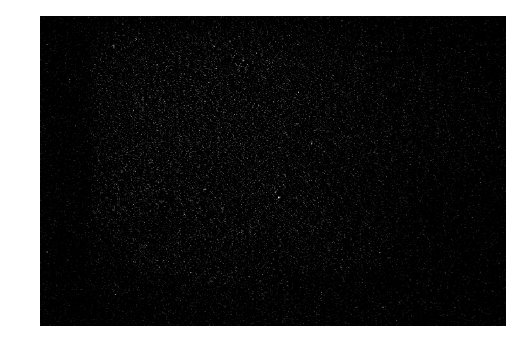

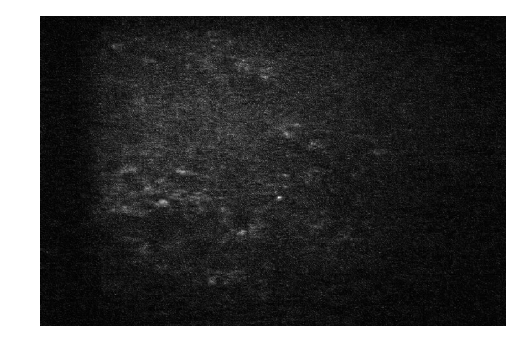

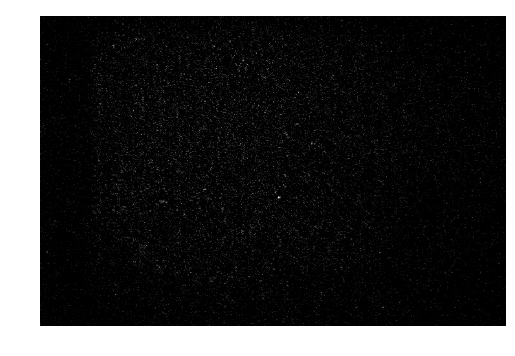

In [7]:
for i in range(numComponents): imgShow(sitk.VectorIndexSelectionCast(refFrame,i))

Therefore we'll perform the registration using the green component

In [8]:
refFrameG = sitk.VectorIndexSelectionCast(refFrame,1)

Our registration procedure is as follows.  We read each input frame from the input directory, find the affine parameters which aligns it's green component with the green component of the reference frame.  We then apply the affine parameters to the input frame and write it to the output directory.

In [11]:
outDirPath = "./out/"

for frameIndex in range(1,numFrames+1):
    inFramePath = inDirPath + "{0:04d}.png".format(frameIndex)
    inFrame = imgRead(inFramePath)
    inFrameG = sitk.VectorIndexSelectionCast(inFrame,1)
    affine = imgAffine(inFrameG, refFrameG, method=ndregTranslation)    
    outFrame = imgApplyAffine(inFrame, affine, size=refFrame.GetSize())
    print("frame = {0}; affine = {1}".format(frameIndex, affine))
    outPath = outDirPath + "{0:04d}.png".format(frameIndex)
    imgWrite(outFrame, outPath)

frame = 1; affine = [1.0, 0.0, 0.0, 1.0, -0.45681776105560346, -0.5619804957116381]
frame = 2; affine = [1.0, 0.0, 0.0, 1.0, -0.39317020650933293, -0.3934267697845552]
frame = 3; affine = [1.0, 0.0, 0.0, 1.0, -0.7261550273757806, -0.4290501589398803]
frame = 4; affine = [1.0, 0.0, 0.0, 1.0, -0.8403572319854378, 1.8172932610311858]
frame = 5; affine = [1.0, 0.0, 0.0, 1.0, -2.350222068687439, 1.3941151743934201]
frame = 6; affine = [1.0, 0.0, 0.0, 1.0, -3.7868796393733515, -1.6667526584967225]
frame = 7; affine = [1.0, 0.0, 0.0, 1.0, -3.5103691223967943, -2.0480576412118645]
frame = 8; affine = [1.0, 0.0, 0.0, 1.0, -3.6570984454346434, -0.8280785050826183]
frame = 9; affine = [1.0, 0.0, 0.0, 1.0, -3.2746508703323, -0.029676499479484954]
frame = 10; affine = [1.0, 0.0, 0.0, 1.0, -3.3504240485771786, 0.6998870100306799]
frame = 11; affine = [1.0, 0.0, 0.0, 1.0, -2.9206209539675205, 1.4755613394502942]
frame = 12; affine = [1.0, 0.0, 0.0, 1.0, -3.0604006171059974, 2.312412650164323]
frame =

We can now combine output frames into a stabilized video avconv.

```avconv -r 23.488 -f image2 -i ./out/%04d.png out.mp4```